In [1]:
from utils import *


In [2]:
df, train, test, val = get_data(normalize=True, binary_label=False)

In [8]:
from sklearn.linear_model import SGDRegressor

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Print the regression coefficients and intercept
# print('Coefficients:', regressor.coef_)
# print('Intercept:', regressor.intercept_)
test_model(regressor, train, test, classification=False)
#works also with not normalized data

Time taken to train the model:  0.06329727172851562
Mean Squared Error: 68456807.6191723
Root Mean Squared Error: 8273.862920013378
R-squared Score: 0.0303616274522428


68456807.6191723

Linear Regression From Scratch

In [4]:
class ScratchLinearRegressionAnalytical:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.weights)


test_model(ScratchLinearRegressionAnalytical(), train, test, classification=False)
#works really poorly with not normalized data
#Why worse than sklearn?

Time taken to train the model:  0.12581801414489746
Mean Squared Error: 69070826.33281086
Root Mean Squared Error: 8310.886013705811
R-squared Score: 0.021664521541046144


69070826.33281086

In [5]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(max_iter=1000, penalty=None, learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False)
test_model(regressor, train, test, classification=False)


Time taken to train the model:  3.0005698204040527
Mean Squared Error: 68487862.14934136
Root Mean Squared Error: 8275.739371762584
R-squared Score: 0.029921763760951903


/media/vmcvastry/DATA/CODE/UNI/FAI/.venv_AI/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


68487862.14934136

In [18]:
class ScratchLinearRegression:

    def __init__(self, lr=0.01, n_iters=1000, regularization=None, alpha=0.1, l1_ratio=0.5):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.regularization_param = alpha
        self.l1_ratio = l1_ratio

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            if self.regularization == 'l1':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + np.sign(self.weights) * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + np.sign(self.bias) * self.regularization_param

            elif self.regularization == 'l2':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * self.weights * self.regularization_param
                db = (1 / n_samples) * np.sum(y_pred - y) + 2 * self.bias * self.regularization_param
            elif self.regularization == 'elasticnet':
                dw = ((1 / n_samples) * np.dot(X.T, (y_pred - y))
                      + 2 * self.weights * (1 - self.regularization_param)
                      + np.sign(self.weights) * self.regularization_param)
                db = ((1 / n_samples) * np.sum(y_pred - y)
                      + 2 * self.bias * (1 - self.regularization_param)
                      + np.sign(self.bias) * self.regularization_param)
            elif self.regularization == 'elasticnetV2':
                dw = (
                        (1 / n_samples) * np.dot(X.T, (y_pred - y))
                        + self.regularization_param *
                        (
                                2 * self.weights * (1 - self.l1_ratio)
                                + np.sign(self.weights) * self.l1_ratio
                        )
                )
                db = (
                        (1 / n_samples) * np.sum(y_pred - y)
                        + self.regularization_param *
                        (
                                2 * self.bias * (1 - self.l1_ratio)
                                + np.sign(self.bias) * self.l1_ratio
                        )
                )
            elif self.regularization is None or self.regularization  == '':
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
            else:
                raise ValueError('Invalid regularization parameter')

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [7]:
#No regularization
regressor = ScratchLinearRegression(regularization='')

test_model(regressor, train, test, classification=False)



Time taken to train the model:  1.5106232166290283
Mean Squared Error: 68584648.91639018
Root Mean Squared Error: 8281.584927801572
R-squared Score: 0.028550853159811096


68584648.91639018

In [8]:


regressor = SGDRegressor(max_iter=1000, penalty='l1', learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False, alpha=100)
test_model(regressor, train, test, classification=False)

Time taken to train the model:  5.170603036880493
Mean Squared Error: 68093449.34977348
Root Mean Squared Error: 8251.875504985122
R-squared Score: 0.035508319698712265


68093449.34977348

Trying hyperparameters: 0.1
Time taken to train the model:  1.2800407409667969
Mean Squared Error: 56026911.628317624
Root Mean Squared Error: 7485.112666374343
R-squared Score: 0.020302408599326527
Value: 56026911.628317624
Trying hyperparameters: 0.2
Time taken to train the model:  1.3278794288635254
Mean Squared Error: 56024723.239108644
Root Mean Squared Error: 7484.96648216334
R-squared Score: 0.020340675203263325
Value: 56024723.239108644
Trying hyperparameters: 0.4
Time taken to train the model:  1.8019678592681885
Mean Squared Error: 56020817.69589558
Root Mean Squared Error: 7484.705585117933
R-squared Score: 0.02040896829970129
Value: 56020817.69589558
Trying hyperparameters: 0.8
Time taken to train the model:  1.1889533996582031
Mean Squared Error: 56014455.79197384
Root Mean Squared Error: 7484.280579452767
R-squared Score: 0.020520213802401877
Value: 56014455.79197384
Trying hyperparameters: 1.6
Time taken to train the model:  1.4326167106628418
Mean Squared Error: 5600712

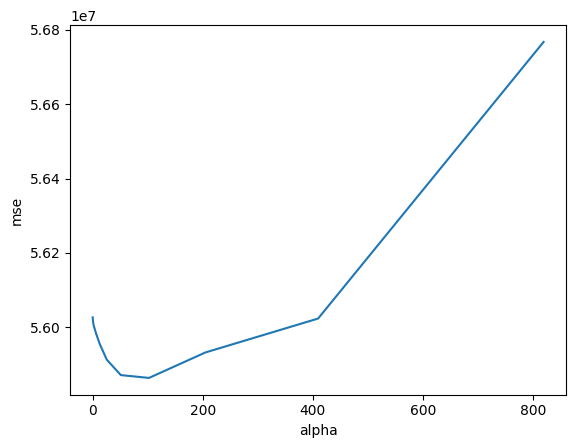

Time taken to train the model:  2.092175006866455
Mean Squared Error: 68093981.92323084
Root Mean Squared Error: 8251.90777476523
R-squared Score: 0.035500776202624484


68093981.92323084

In [9]:
#L1 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l1', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha
    alpha = 0.1
    while alpha < 1000:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l1', alpha=best_param)

test_model(regressor, train, test, classification=False)


In [12]:
regressor = SGDRegressor(max_iter=1000, penalty='l2', learning_rate='constant', shuffle=False, eta0=0.00001,
                         early_stopping=False, alpha=0.5)
test_model(regressor, train, test, classification=False)

Time taken to train the model:  0.3334224224090576
Mean Squared Error: 68329842.32576886
Root Mean Squared Error: 8266.18668587692
R-squared Score: 0.03215999381999146


68329842.32576886

Trying hyperparameters: 0.001
Time taken to train the model:  1.4434599876403809
Mean Squared Error: 56023462.928079695
Root Mean Squared Error: 7484.88229219937
R-squared Score: 0.020362713249687747
Value: 56023462.928079695
Trying hyperparameters: 0.002
Time taken to train the model:  1.2682759761810303
Mean Squared Error: 56017783.39745962
Root Mean Squared Error: 7484.502882453825
R-squared Score: 0.02046202663868346
Value: 56017783.39745962
Trying hyperparameters: 0.004
Time taken to train the model:  1.1329145431518555
Mean Squared Error: 56006856.37804469
Root Mean Squared Error: 7483.7728705543095
R-squared Score: 0.020653098648381607
Value: 56006856.37804469
Trying hyperparameters: 0.008
Time taken to train the model:  0.9977173805236816
Mean Squared Error: 55986673.9848568
Root Mean Squared Error: 7482.4243387325205
R-squared Score: 0.021006011943443204
Value: 55986673.9848568
Trying hyperparameters: 0.016
Time taken to train the model:  1.3985075950622559
Mean Squared Error:

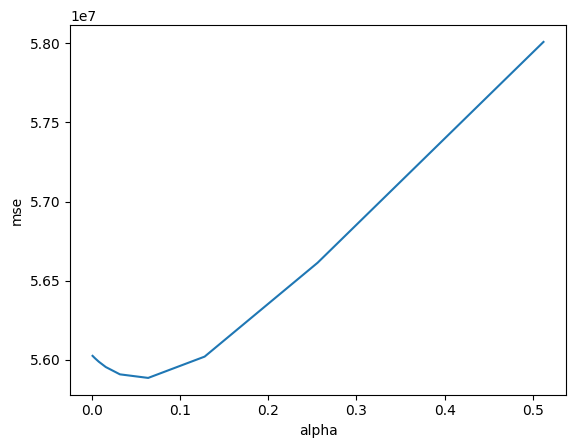

Time taken to train the model:  1.1296629905700684
Mean Squared Error: 68394301.51287682
Root Mean Squared Error: 8270.084734322667
R-squared Score: 0.031246978687430538


68394301.51287682

In [17]:
#L2 regularization

def get_model(param):
    return ScratchLinearRegression(regularization='l2', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha
    alpha = 0.001
    while alpha < 1:
        yield alpha
        alpha *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='l2', alpha=best_param)

test_model(regressor, train, test, classification=False)

In [6]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# alpha = 10
# model = Ridge(alpha=alpha)
# alpha = 0.01
# model = Lasso(alpha=alpha)

model = ElasticNet(alpha=0.01, l1_ratio=0.2)
test_model(model, train, test, classification=False)


Time taken to train the model:  1.9735321998596191
Mean Squared Error: 68474666.30171251
Root Mean Squared Error: 8274.942072408272
R-squared Score: 0.030108672859757712


68474666.30171251

In [10]:
model=SGDRegressor(max_iter=1000, penalty='elasticnet', learning_rate='constant', shuffle=False, eta0=0.00001, early_stopping=False, alpha=0.5, l1_ratio=0.5)
test_model(model, train, test, classification=False)

Time taken to train the model:  1.7107963562011719
Mean Squared Error: 68381023.64212853
Root Mean Squared Error: 8269.28193026024
R-squared Score: 0.031435049581050034


68381023.64212853

Trying hyperparameters: 0.9990009990009991
Time taken to train the model:  2.0301804542541504
Mean Squared Error: 56006295.459590904
Root Mean Squared Error: 7483.735394813936
R-squared Score: 0.020662906978738738
Value: 56006295.459590904
Trying hyperparameters: 0.998003992015968
Time taken to train the model:  1.2977888584136963
Mean Squared Error: 56000627.83486049
Root Mean Squared Error: 7483.3567224114395
R-squared Score: 0.020762012179007194
Value: 56000627.83486049
Trying hyperparameters: 0.9960159362549801
Time taken to train the model:  1.377115249633789
Mean Squared Error: 55989746.36672418
Root Mean Squared Error: 7482.629642493619
R-squared Score: 0.02095228767009205
Value: 55989746.36672418
Trying hyperparameters: 0.9920634920634921
Time taken to train the model:  1.4177486896514893
Mean Squared Error: 55969809.10386689
Root Mean Squared Error: 7481.297287494121
R-squared Score: 0.021300914568001206
Value: 55969809.10386689
Trying hyperparameters: 0.984251968503937
Time t

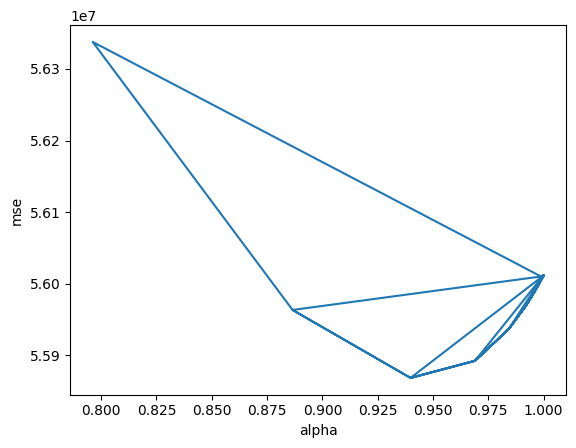

Time taken to train the model:  1.145259141921997
Mean Squared Error: 68387676.64274618
Root Mean Squared Error: 8269.684192443276
R-squared Score: 0.03134081491081331


68387676.64274618

In [13]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    l1 = 1
    while l1 < 200:
        l2 = 0.001
        while l2 < 0.5:
            yield l1/(l1+l2)
            l2 *= 2
        l1 *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

test_model(regressor, train, test, classification=False)

Trying hyperparameters: 0.91
Time taken to train the model:  1.3808584213256836
Mean Squared Error: 55904913.86416126
Root Mean Squared Error: 7476.958864682971
R-squared Score: 0.022435685487639745
Value: 55904913.86416126
Trying hyperparameters: 0.92
Time taken to train the model:  1.1047961711883545
Mean Squared Error: 55887276.51624723
Root Mean Squared Error: 7475.779325010018
R-squared Score: 0.022744095620697014
Value: 55887276.51624723
Trying hyperparameters: 0.93
Time taken to train the model:  1.0943922996520996
Mean Squared Error: 55875007.554799184
Root Mean Squared Error: 7474.958699203574
R-squared Score: 0.022958633092606373
Value: 55875007.554799184
Trying hyperparameters: 0.9400000000000001
Time taken to train the model:  1.1066339015960693
Mean Squared Error: 55868637.835250504
Root Mean Squared Error: 7474.5326165085735
R-squared Score: 0.023070015260896137
Value: 55868637.835250504
Trying hyperparameters: 0.9500000000000001
Time taken to train the model:  1.27178716

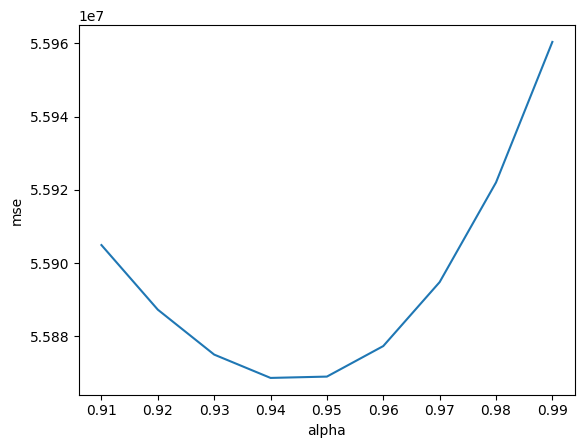

Time taken to train the model:  1.1934008598327637
Mean Squared Error: 68387703.38223955
Root Mean Squared Error: 8269.685809161045
R-squared Score: 0.031340436166321206


68387703.38223955

In [14]:
#Elastic net regularization

def get_model(param):
    return ScratchLinearRegression(regularization='elasticnet', alpha=param)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    for a in range(1,10):
        yield 0.9+ a/100


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
regressor = ScratchLinearRegression(regularization='elasticnet', alpha=best_param)

test_model(regressor, train, test, classification=False)

Trying hyperparameters: (0.01, 0.5)
Time taken to train the model:  1.8538179397583008
Mean Squared Error: 56001486.63726316
Root Mean Squared Error: 7483.414103018966
R-squared Score: 0.020746994991357015
Value: 56001486.63726316
Trying hyperparameters: (0.01, 0.6)
Time taken to train the model:  1.1796128749847412
Mean Squared Error: 56006714.014235385
Root Mean Squared Error: 7483.763359048399
R-squared Score: 0.020655588049939166
Value: 56006714.014235385
Trying hyperparameters: (0.01, 0.7)
Time taken to train the model:  1.4242687225341797
Mean Squared Error: 56012081.66403663
Root Mean Squared Error: 7484.1219701469745
R-squared Score: 0.02056172827025593
Value: 56012081.66403663
Trying hyperparameters: (0.01, 0.8)
Time taken to train the model:  1.2425601482391357
Mean Squared Error: 56017591.62969057
Root Mean Squared Error: 7484.490071453804
R-squared Score: 0.020465379927593785
Value: 56017591.62969057
Trying hyperparameters: (0.01, 0.9)
Time taken to train the model:  1.1882

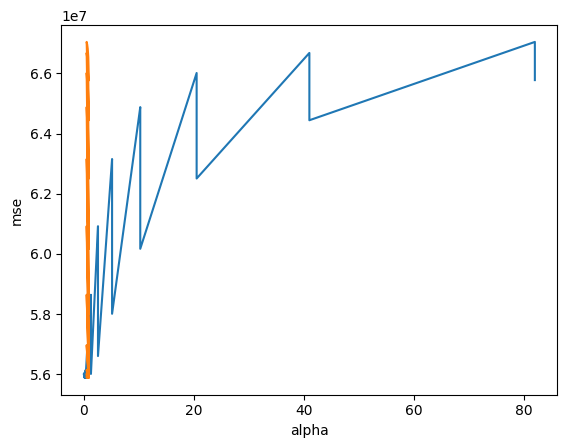

Time taken to train the model:  2.4938156604766846
Mean Squared Error: 68390149.31812192
Root Mean Squared Error: 8269.833693498433
R-squared Score: 0.031305791353470114


68390149.31812192

In [19]:
#Elastic net regularization

def get_model(param):
    a, b = param
    return ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)


def iterate_hyperparameters():
    # for alpha in range(1,1000,100): #giuliu dice esponenziale tra 0 e 1
    #     yield alpha

    a = 0.01
    while a < 100:
        for b in range(5,10):
            yield a, b/10
        a *= 2


best_param, params, accuracies = optimize_hyperparameters(get_model, iterate_hyperparameters(), train, test, val,
                                                          classification=False)
plot_2d(params, accuracies, 'alpha', 'mse')
a, b = best_param
regressor = ScratchLinearRegression(regularization='elasticnetV2', alpha=a, l1_ratio=b)

test_model(regressor, train, test, classification=False)